In [1]:
import os 
import sys
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
import numpy as np
import chess
import chess.engine 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['svg.fonttype'] = 'none'

In [7]:
results_folder = '/Users/erussek/Dropbox/Griffiths_Lab_Stuff/Chess_Data/April_Chess_CSVs'
results_file_names = os.listdir(results_folder)


In [19]:
res_dfs = []
for res_file_idx in range(5):
    this_file = results_file_names[res_file_idx]
    this_fullfile = os.path.join(results_folder, this_file)
    res_df = pd.read_csv(this_fullfile, index_col=0)
    res_dfs.append(res_df)

In [20]:
res_df = pd.concat(res_dfs, ignore_index = True)

In [24]:
res_df.head()

,Last_Move_Quality_Depth_1,Last_Move_Quality_Depth_2,Last_Move_Quality_Depth_3,Last_Move_Quality_Depth_4,Last_Move_Quality_Depth_5,Last_Move_Quality_Depth_6,Last_Move_Quality_Depth_7,Last_Move_Quality_Depth_8,Last_Move_Quality_Depth_9,Last_Move_Quality_Depth_10,Last_Move_Quality_Depth_11,Last_Move_Quality_Depth_12,Last_Move_Quality_Depth_13,Last_Move_Quality_Depth_14,Last_Move_Quality_Depth_15,white_active,game_id,move_ply,rt,move,time_control,active_elo,board,clock_percent,opp_clock_percent,clock,opp_clock,num_legal_moves,lowest_depths,VoC,best_move,lowest_nodes_wr,lowest_nodes_wor,Last_Move_Quality_Depth_2_bin
0,-0.085190,-0.091862,-0.153027,-0.047196,-0.189519,-0.124319,-0.124319,-0.060247,-0.015991,-0.045233,-0.041429,-0.044590,-0.047535,-0.065144,-0.047050,True,001Njqca,6.0,13.0,f3e5,600+0,1458.0,rnbqk2r/pppp1ppp/5n2/2b1p3/4P3/2N2N2/PPPP1PPP/...,0.038,0.003,577.0,598.0,29.0,9,0.069199,False,2741,3194,-0.089474
1,0.000000,0.000000,-0.507062,-0.034049,0.004522,-0.001084,-0.155274,-0.037598,0.000000,-0.000550,-0.003291,-0.010338,-0.006070,0.003856,0.036251,False,001Njqca,7.0,11.0,c7c6,600+0,1465.0,rnbqk2r/pppp1ppp/5n2/2b1N3/4P3/2N5/PPPP1PPP/R1...,0.022,0.038,587.0,577.0,33.0,15,0.036251,False,86054,84803,-0.005263
2,-0.086257,-0.061070,-0.085519,-0.319734,-0.091429,-0.159484,-0.012740,-0.085075,-0.135534,-0.084444,-0.116880,-0.065016,-0.085245,-0.113725,-0.098244,True,001Njqca,8.0,16.0,d2d4,600+0,1458.0,rnbqk2r/pp1p1ppp/2p2n2/2b1N3/4P3/2N5/PPPP1PPP/...,0.065,0.022,561.0,587.0,37.0,7,0.073517,False,158,664,-0.057895
3,0.000000,0.000000,-0.050736,-0.050736,-0.017959,0.061274,0.027260,0.009523,-0.016699,-0.002645,-0.039796,-0.016699,0.013293,-0.031241,-0.008108,False,001Njqca,9.0,4.0,c5b6,600+0,1465.0,rnbqk2r/pp1p1ppp/2p2n2/2b1N3/3PP3/2N5/PPP2PPP/...,0.028,0.065,583.0,561.0,32.0,6,0.061274,False,103,415,-0.005263
4,-0.010966,0.017620,-0.041738,-0.078319,-0.100411,-0.011482,-0.023195,-0.036421,0.086236,-0.019327,-0.011297,-0.010793,0.006296,0.007288,0.015397,True,001Njqca,10.0,10.0,d4d5,600+0,1458.0,rnbqk2r/pp1p1ppp/1bp2n2/4N3/3PP3/2N5/PPP2PPP/R...,0.082,0.028,551.0,583.0,44.0,9,0.097202,False,1764,3407,NaN


In [23]:
res_df.shape

(2272895, 34)

Text(0, 0.5, 'Move Time (Seconds)')

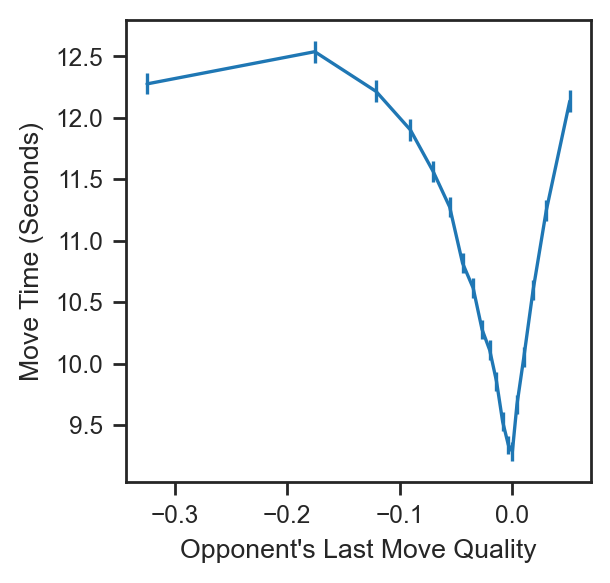

In [55]:
this_tc = "600+0"
tc_df = res_df.loc[res_df.time_control == this_tc]

sns.set_style("ticks")

sns.set_context('paper')

fig,ax = plt.subplots(1, figsize=(3,3), dpi=200)

d_idx = 0
depths_to_plot = [8]
depth_number = depths_to_plot[d_idx]
this_col = 'Last_Move_Quality_Depth_{}'.format(depth_number)
this_col_bin_name = this_col + '_bin'
tc_df = tc_df.dropna(subset = this_col)


def get_midpoints(x):
    return (x[1:] + x[:-1]) / 2

n_bin_bounds = 20
# bin_bounds = np.linspace(-.2,.2,n_bin_bounds)
bin_bounds = np.unique(np.percentile(tc_df[this_col],np.arange(0,100,100/n_bin_bounds)))#np.linspace(-.001,.05,n_bin_bounds)

bin_labels = get_midpoints(bin_bounds)
tc_df[this_col_bin_name] = pd.cut(tc_df[this_col], bin_bounds, labels=bin_labels)
agg_df = tc_df.groupby(this_col_bin_name).agg({'rt': ['mean', 'count', 'std'], this_col: 'mean'}).reset_index()
ax.errorbar(agg_df[this_col]['mean'], agg_df['rt']['mean'], yerr = agg_df['rt']['std']/np.sqrt(agg_df['rt']['count']), label = '{}'.format(depth_number - 1))
ax.set_xlabel("Opponent's Last Move Quality")
ax.set_ylabel("Move Time (Seconds)")

In [59]:
np.mean(tc_df[this_col] > 0)

0.3118164823331767